In [1]:
#Std. imports - these exercises don't need pyCycle all relavant code is written here
import os
import sys
import time
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib notebook
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from ipywidgets.embed import embed_minimal_html
from labellines import labelLine, labelLines

from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:90% !important; }</style>"))
from CompFlow import *

/var/folders/nt/08bs045x0fl9qm1n7mzmtcnc0000gn/T/ipykernel_14559/2365917315.py:14: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, clear_output
/var/folders/nt/08bs045x0fl9qm1n7mzmtcnc0000gn/T/ipykernel_14559/2365917315.py:14: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, clear_output


In [2]:
# Calculations
image = plt.imread("CompFlow.png")
RSL = 287
exec_count = 0

def Vthroat(Pamb, Pt, Tt, gam = 1.4, R = 287.05):
   
    pr = Pt/Pamb
    M = PRtoM(pr, gam)
    if M>1:
        M =1
    Pthroat = Pt/PR(M, gam)
    tr = TR(M)
    T = Tt/tr
    a = np.sqrt(gam*R*T)
    V = M*a
    rho = Pthroat*101325/R/T
    A = 1
    
    mdot = D(M, gam, R)*Pt*101325*A/np.sqrt(Tt)

    Pbktxt.set_text(fr"P$_\mathrm{{bk}}$ = {Pamb:.3f} atm")
    Pttxt.set_text(fr"P$_t$ = {Pt:.3f} atm")

    
    warntxt.set_text("")
    if V >= a:
        V = a
        warntxt.set_text("Note: V = a; Flow is choked!")
    
    b1.set_height(V)
    b2.set_height(mdot)

    lss.set_ydata(a)
    lss_txt.set_position((0.4,a))
    lss_txt.set_text(f"Speed of sound \n= {a:.2f} m/s")


    anchor = 1020
    scale = 0.5

    arrows1.set_xdata((anchor-a*scale/2, anchor+a*scale/2))
    arrows2.set_xdata((anchor-V*scale/2, anchor+V*scale/2))
    if V == 0:
        arrows2.set_marker(' ')
    else:
        arrows2.set_marker('>')
    
    sumtxt.set_text(f"T = {Tt0:.2f} K\nV = {V:.2f} m/s\n"+
                  r"$\dot{m}/A$ = "+f"{mdot:.0f}"+ r" kg/(s.m$^2$)"+"\n"+
                  r"$\rho$ = "+f"{rho:.2f}"+ r" kg/m$^3$"+f"\nPR = {pr:.2f}")
    

    txt1.set_text( f"Speed of fluid flow \n= {V:.2f} m/s")
    txt2.set_text(f"Speed of pressure waves =\nSpeed of sound = {a:.2f} m/s")
    


In [3]:
# This creates the actual widget sliders needed
Tt0 = 298.0
Pt0 = 2.0
Pt_widget   = FloatSlider(min = 0.5, max = 5, step = 0.1, value = Pt0,  description = r'\(P_t\ [atm]\)', readout_format = '.1f')
Pamb_widget = FloatSlider(min = 0.0001, max = 2, step = 0.001, value = Pt0,  description = r'\(P_{bk}\ [atm]\)', readout_format = '.3f')
Tt_widget   = FloatSlider(min = 150, max = 500, step = 10, value = Tt0, description = r'\(T_t\ [K]\)',readout_format = '.1f')
gam_widget  = FloatSlider(min = 1.33, max = 1.67,  step = 0.01, value = 1.4, description = r'\(\gamma\)', readout_format = '.2f')
# Just a function to ensure that Pamb max is the Pt value to constrain problem from having reverse flow situations
def update_pamb_range(*args):
    Pamb_widget.max = Pt_widget.value
Pt_widget.observe(update_pamb_range, 'value')



# Compressible Flow through a nozzle

In this experiment we will investigate the flow through a nozzle (or simply just an opening in this case). Nozzles are one of the most basic fluid mechanical devices that also helps serve as a model for more complex devices such as a turbine.

## Experimental setup

We have a large upstream *reservoir* where the fluid properties such as the total pressure ($P_{t0}$) and total temperature ($T_{t0}$) are **constant** 
>*Are the properties really constant?* Think of this as very large storage tank such that opening a tap attached to it makes such a small difference in the properties of the fluid that it can be assumed to be unaffected - think of taking a few mugs of water out of a pond, yes something did change but it is so minuscule that it makes no practical difference).

This reservoir is attached to another chamber through a small opening - we'll call this opening a **nozzle**. We have installed a device in this chamber that allows us to control the pressure in the chamber (this is frequently refered to as the **back pressure**). 

Initially the chamber pressure equals the reservoir pressure

$$ P_{bk} = P_{t0} $$

At this time there is no flow through the nozzle. 

>*Question*: Does this make sense to you? Why is there no flow through the nozzle initally?

When the chamber back pressure is reduced by means of this device fluid starts to flow from the reservoir to the secondary chamber (see the blue arrow!). What determines the rate of mass flow? The velocity? These are some of the fundamental questions we are going to try and get an intiutive understanding for.


## Tasks to carry out

Start by decreasing the pressure $P_{bk}$ in the chamber and note what happens to the flow through the nozzle.

- Explain using simple physical arguments why you observe what you observe
- In this physical setup how does information about the downstream chamber pressure propagate upstream
- Continue decreasing the pressure in the chamber - is there a limit to how quickly you can extract fluid from the reservoir? If so, think of a physical argument why this is the case
- What physical parameters allow you to maximize the velocity at the nozzle?
- Your task now is to maximize the flow rate through the nozzle - play around with the other knobs and explain how you would maximize the rate at which you extract fluid from the reservoir. This plays an important role in fluid devices

<IPython.core.display.Javascript object>


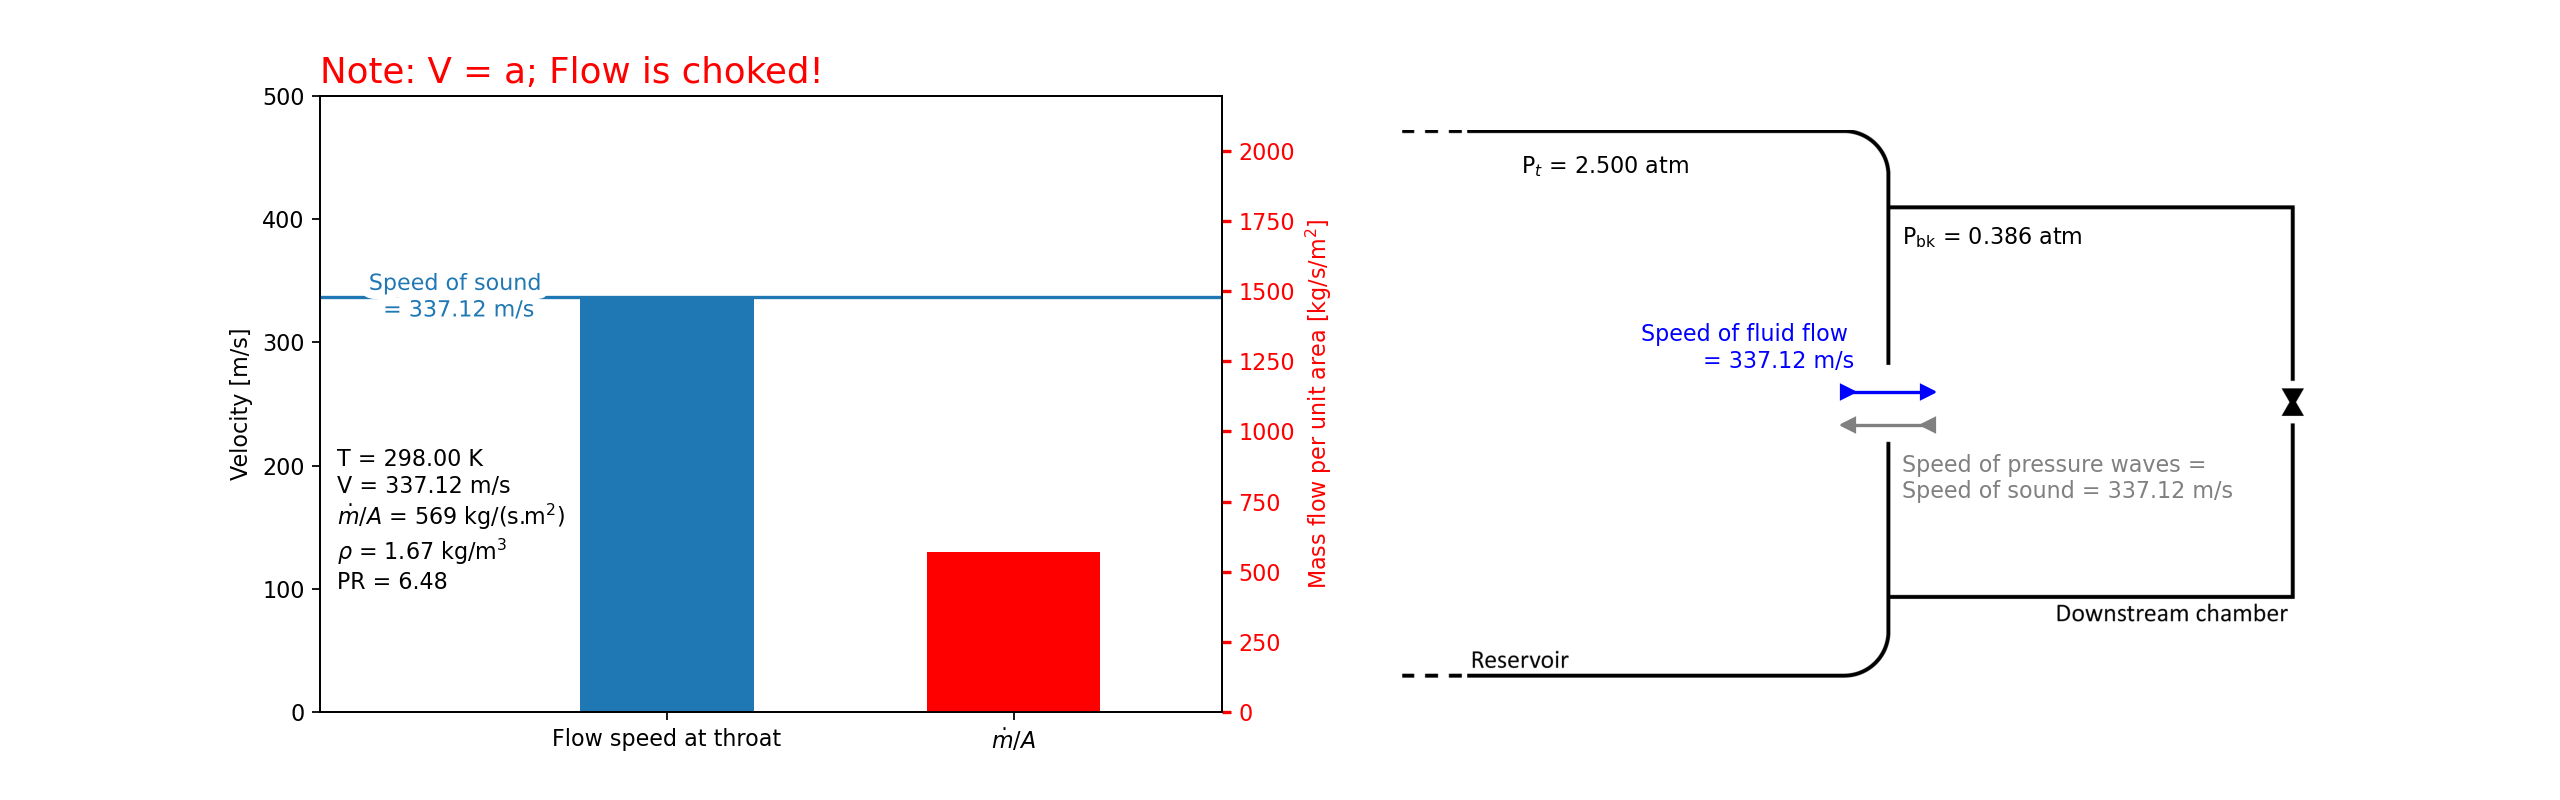

interactive(children=(FloatSlider(value=2.0, description='\\(P_{bk}\\ [atm]\\)', max=2.0, min=0.0001, readout_…

In [4]:
# plt.ion()
fig, [ax, axins] = plt.subplots(1,2, figsize =(16,5), dpi = 100)
#inset image
# axins = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(3,0, 3, 500), bbox_transform=ax.transData)
axins.imshow(image)
axins.axis("off")
axins.grid()

ax.set_ylim(0,500)
ax.set_xlim(0, 2.6)
ax.set_xticks([1.0, 2.0])
ax.set_xticklabels(["Flow speed at throat", r"$\dot{m}/A$"])
ax.set_ylabel("Velocity [m/s]")

ar = ax.twinx()
ar.set_ylabel(r"Mass flow per unit area [kg/s/m$^2$]", color ="r")
ar.tick_params(axis ="y", colors = "r", size = 4, width = 1.5)
mdotmax = D(1.0, 1.67, RSL)*5*101325*1/np.sqrt(100)

ar.set_ylim(0, mdotmax*1.01)
anchor = 1020
scale = 0.5
a = 340
V = 0.0

(lss) = ax.axhline(340)
lss_txt = labelLine(lss, 0.4, f"Speed of sound \n= {a:.2f} m/s")
b1,= ax.bar(1.0, 0, width = 0.5)
b2,= ar.bar(2.0, 0, width = 0.5, color = "r")



arrows1, = axins.plot((anchor-a*scale/2, anchor+a*scale/2),(620,620), '<-', color = "gray")
arrows2, = axins.plot((anchor-V*scale/2, anchor+V*scale/2),(550,550), '>-', color = "b")


# plt.tight_layout()
txt1 = axins.text(950, 500, f"Speed of fluid flow \n= {V:.2f} m/s", color = "b", ha="right")
txt2 = axins.text(1050, 680, f"Speed of pressure waves =\nSpeed of sound = {a:.2f} m/s", color = "gray", va = "top")
rho = Pt0*101325/Tt0/RSL
Pamb = Pt0
Pt = Pt0
mdot = 0
sumtxt = ax.text(0.05, 100, f"T = {Tt0:.2f} K\nV = {V:.2f} m/s\n"+
                  r"$\dot{m}/A$ = "+f"{mdot:.0f}"+ r" kg/(s.m$^2$)"+"\n"+
                  r"$\rho$ = "+f"{rho:.2f}"+ r" kg/m$^3$"+f"\nPR = {1.0:.2f}", fontsize = 10)

warntxt = ax.text(0.0, 505, "", color = "r", ha = "left", va = "bottom", size = 16, clip_on = False)

Pbktxt = axins.text(1050, 200, fr"P$_\mathrm{{bk}}$ = {Pamb:.3f} atm", color = "black", va = "top")
Pttxt = axins.text(250, 50, fr"P$_t$ = {Pt:.3f} atm", color = "black", va = "top")

interact(Vthroat, Pt = Pt_widget, Tt = Tt_widget, Pamb=Pamb_widget, gam=gam_widget, R = fixed(287));

In [6]:
embed_minimal_html('export.html', views=[Pt_widget, Tt_widget, Pamb_widget, gam_widget], title='Widgets export')
